In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:


def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [8]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = []

for tweet in tweepy.Cursor(extractor.user_timeline, screen_name="ttcnotices", exclude_replies=True, include_rts=False).items(500):
    tweets.append(tweet)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")

for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 500.

5 recent tweets:

127 Davenport diverting eastbound via Davenport, Spadina (George Brown College wont be serviced) due to construction at Kendal &amp; Davenport.

Elevator Alert: Victoria Park Station, street to concourse to pedestrian overpass, back in service. #TTC

ALL CLEAR: The delay at Dundas and Annette has cleared. 40 Junction has resumed regular routing. #TTC

40 Junction diverting southbound via Annette, Indian Grove, Humberside, due to a collision at Dundas and Annette. #TTC

ALL CLEAR: The delay at Bathurst and Shelbourne has cleared. 7 Bathurst has resumed regular routing. #TTC



In [19]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,127 Davenport diverting eastbound via Davenpor...
1,"Elevator Alert: Victoria Park Station, street ..."
2,ALL CLEAR: The delay at Dundas and Annette has...
3,"40 Junction diverting southbound via Annette, ..."
4,ALL CLEAR: The delay at Bathurst and Shelbourn...
5,"Elevator Alert: Victoria Park Station, street ..."
6,"7 Bathurst diverting both ways via Lawrence, G..."
7,"307 Bathurst diverting both ways via Lawrence,..."
8,ALL CLEAR: The delay westbound at King and Bay...
9,Dundas Stn closing at 11 pm nightly from Sept...


In [20]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [21]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

910133171978690562
2017-09-19 13:27:12
Hootsuite
2
2
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [22]:
# We add relevant data:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [23]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,127 Davenport diverting eastbound via Davenpor...,143,910133171978690562,2017-09-19 13:27:12,Hootsuite,2,2
1,"Elevator Alert: Victoria Park Station, street ...",104,910107076667564032,2017-09-19 11:43:30,Hootsuite,0,0
2,ALL CLEAR: The delay at Dundas and Annette has...,101,910101256596869120,2017-09-19 11:20:23,Hootsuite,3,3
3,"40 Junction diverting southbound via Annette, ...",118,910090243843510272,2017-09-19 10:36:37,Hootsuite,4,4
4,ALL CLEAR: The delay at Bathurst and Shelbourn...,105,910082552064552960,2017-09-19 10:06:03,Hootsuite,2,1
5,"Elevator Alert: Victoria Park Station, street ...",103,910082440844193792,2017-09-19 10:05:37,Hootsuite,1,0
6,"7 Bathurst diverting both ways via Lawrence, G...",123,910071344146022401,2017-09-19 09:21:31,Hootsuite,2,1
7,"307 Bathurst diverting both ways via Lawrence,...",125,910044692112396288,2017-09-19 07:35:37,Hootsuite,1,1
8,ALL CLEAR: The delay westbound at King and Bay...,123,909979132896915456,2017-09-19 03:15:06,Hootsuite,2,1
9,Dundas Stn closing at 11 pm nightly from Sept...,134,909970662231543808,2017-09-19 02:41:26,Hootsuite,2,0


In [24]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 117.668


In [25]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
REMINDER: No train service on Line 1 between Sheppard West and Lawrence West due to scheduled track work. Shuttle b… https://t.co/QsYLjxlF4l
Number of likes: 8
140 characters.

The tweet with more retweets is: 
UPDATE: Trains are turning back at Lawrence and Sheppard stns due to a medical emergency on a train at York Mills Stn. Shuttles operating
Number of retweets: 13
137 characters.



In [26]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

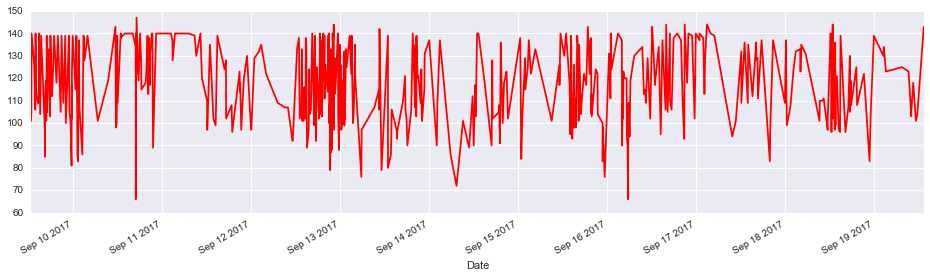

In [27]:
# Lenghts along time:
tlen.plot(figsize=(16, 4), color='r')

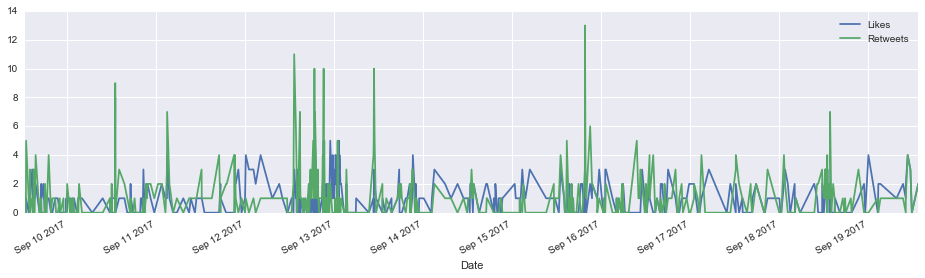

In [28]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16, 4), label="Likes", legend=True)
tret.plot(figsize=(16, 4), label="Retweets", legend=True)

In [29]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Hootsuite
* Twitter Web Client


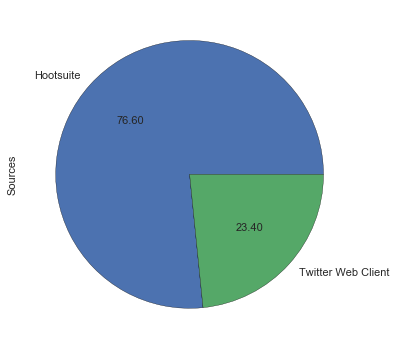

In [30]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))

In [31]:
from textblob import TextBlob
import re


def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [32]:
# We create a column with the result of the analysis:
data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,127 Davenport diverting eastbound via Davenpor...,143,910133171978690562,2017-09-19 13:27:12,Hootsuite,2,2,-1
1,"Elevator Alert: Victoria Park Station, street ...",104,910107076667564032,2017-09-19 11:43:30,Hootsuite,0,0,0
2,ALL CLEAR: The delay at Dundas and Annette has...,101,910101256596869120,2017-09-19 11:20:23,Hootsuite,3,3,1
3,"40 Junction diverting southbound via Annette, ...",118,910090243843510272,2017-09-19 10:36:37,Hootsuite,4,4,-1
4,ALL CLEAR: The delay at Bathurst and Shelbourn...,105,910082552064552960,2017-09-19 10:06:03,Hootsuite,2,1,1
5,"Elevator Alert: Victoria Park Station, street ...",103,910082440844193792,2017-09-19 10:05:37,Hootsuite,1,0,0
6,"7 Bathurst diverting both ways via Lawrence, G...",123,910071344146022401,2017-09-19 09:21:31,Hootsuite,2,1,-1
7,"307 Bathurst diverting both ways via Lawrence,...",125,910044692112396288,2017-09-19 07:35:37,Hootsuite,1,1,-1
8,ALL CLEAR: The delay westbound at King and Bay...,123,909979132896915456,2017-09-19 03:15:06,Hootsuite,2,1,1
9,Dundas Stn closing at 11 pm nightly from Sept...,134,909970662231543808,2017-09-19 02:41:26,Hootsuite,2,0,1


In [33]:
# We construct lists with classified tweets:

pos_tweets = [tweet for index, tweet in enumerate(
    data['Tweets']) if data['SA'][index] > 0]

neu_tweets = [tweet for index, tweet in enumerate(
    data['Tweets']) if data['SA'][index] == 0]

neg_tweets = [tweet for index, tweet in enumerate(
    data['Tweets']) if data['SA'][index] < 0]

In [34]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(
    len(pos_tweets) * 100 / len(data['Tweets'])))

print("Percentage of neutral tweets: {}%".format(
    len(neu_tweets) * 100 / len(data['Tweets'])))

print("Percentage de negative tweets: {}%".format(
    len(neg_tweets) * 100 / len(data['Tweets'])))

Percentage of positive tweets: 38.6%
Percentage of neutral tweets: 12.8%
Percentage de negative tweets: 48.6%
